In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Read Data from CSV File

In [21]:
data = pd.read_csv('Maybank.csv')

### Data Descriptions

In [22]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-01,8.238324,8.286221,8.046735,8.046735,2.275965,54426939.0
1,2000-03-02,8.046735,8.046735,7.759352,7.759352,2.194681,55151407.0
2,2000-03-03,7.759352,7.759352,7.424071,7.567763,2.140491,37436397.0
3,2000-03-06,7.663557,7.855146,7.424071,7.424071,2.099849,14591656.0
4,2000-03-07,7.424071,7.663557,7.424071,7.567763,2.140491,13562369.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5033 non-null   object 
 1   Open       5032 non-null   float64
 2   High       5032 non-null   float64
 3   Low        5032 non-null   float64
 4   Close      5032 non-null   float64
 5   Adj Close  5032 non-null   float64
 6   Volume     5032 non-null   float64
dtypes: float64(6), object(1)
memory usage: 275.4+ KB


### Data Preprocessing

In [24]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)

datetime_object = str_to_datetime('2000-03-01')
datetime_object

datetime.datetime(2000, 3, 1, 0, 0)

In [25]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

0      2000-03-01
1      2000-03-02
2      2000-03-03
3      2000-03-06
4      2000-03-07
          ...    
5028   2020-03-05
5029   2020-03-06
5030   2020-03-09
5031   2020-03-10
5032   2020-03-11
Name: Date, Length: 5033, dtype: datetime64[ns]

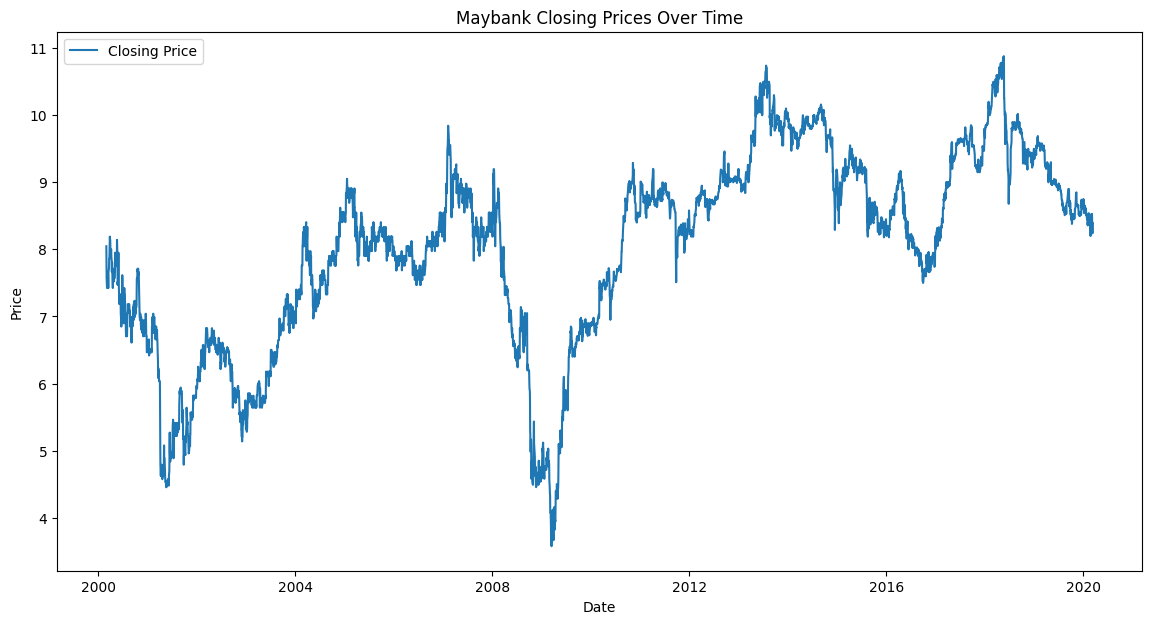

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Maybank Closing Prices Over Time')
plt.legend()
plt.show()

## Candlestick Chart: Visualize the daily price movements (open, high, low, close)

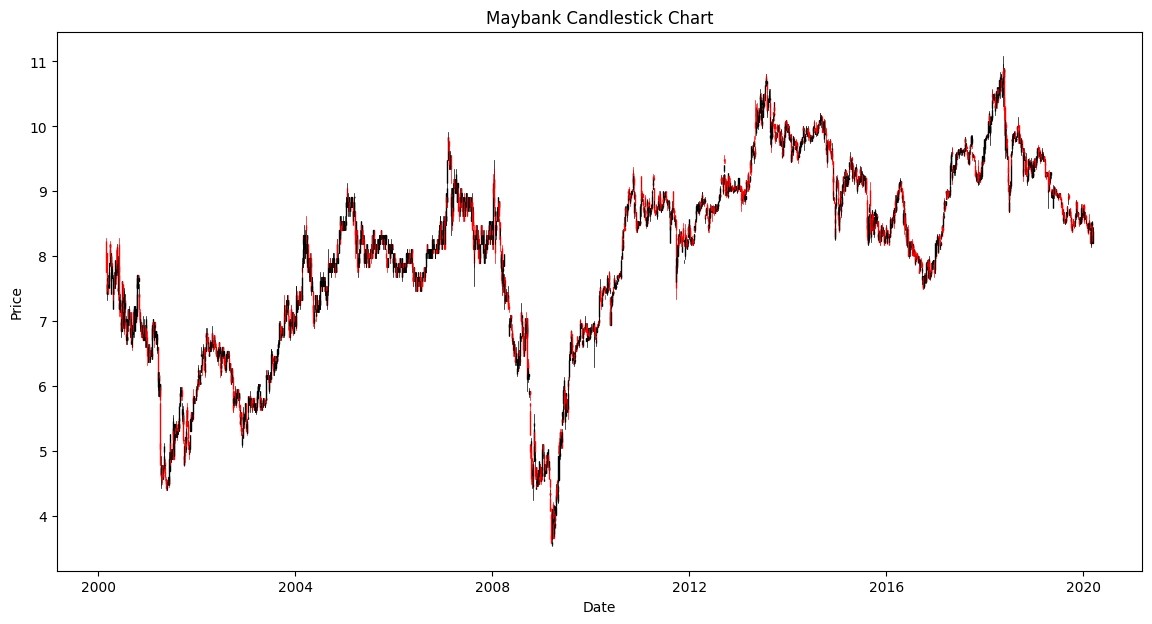

In [27]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 7))
ax.xaxis_date()

candlestick_ohlc(ax, zip(mdates.date2num(data['Date']), data['Open'], data['High'], data['Low'], data['Close']), width=0.6)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Maybank Candlestick Chart')
plt.show()

## Volume

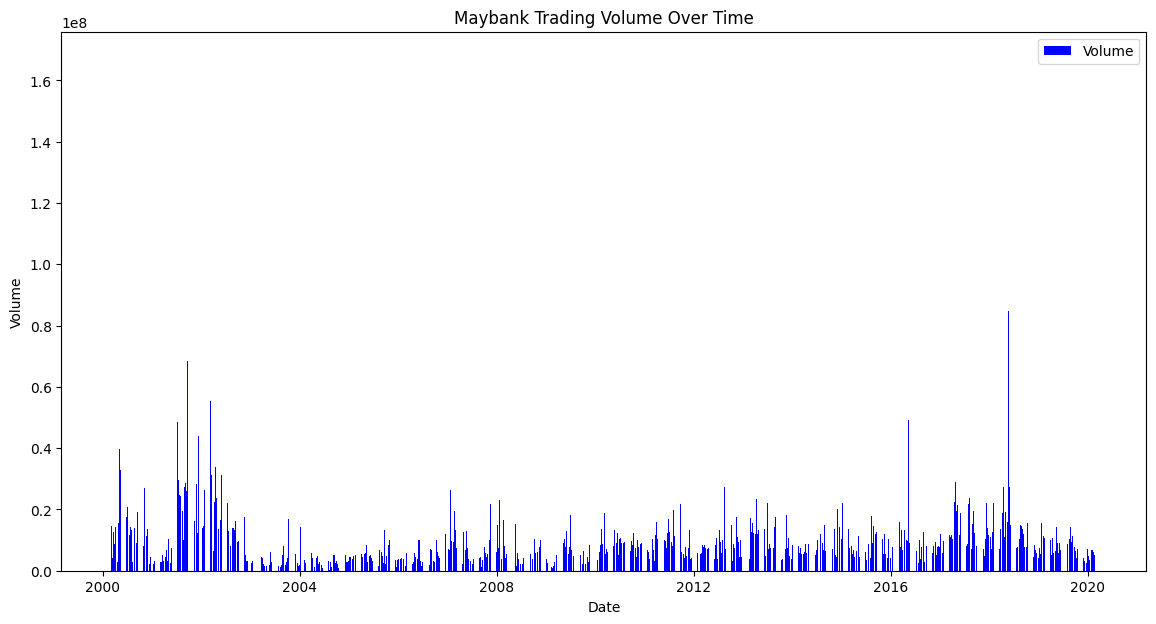

In [28]:
plt.figure(figsize=(14, 7))
plt.bar(data['Date'], data['Volume'], label='Volume', color='blue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Maybank Trading Volume Over Time')
plt.legend()
plt.show()

## Moving Average

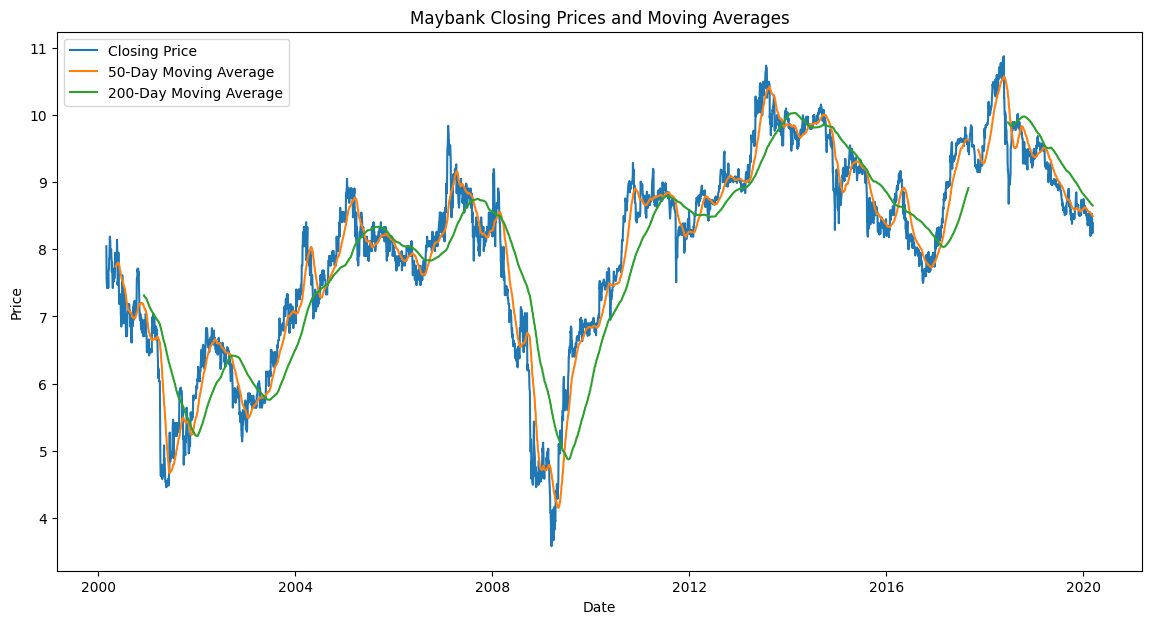

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.plot(data['Date'], data['Close'].rolling(window=50).mean(), label='50-Day Moving Average')
plt.plot(data['Date'], data['Close'].rolling(window=200).mean(), label='200-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Maybank Closing Prices and Moving Averages')
plt.legend()
plt.show()

In [30]:
data=data.dropna() ##Droping the data that contain NaN

# Preprocess and normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# Define the look_back window and create input-output pairs
look_back = 60
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back].flatten())
    y.append(scaled_data[i+look_back][0])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from tensorflow.keras.layers import Activation

model = Sequential([
    Dense(units=64, activation='sigmoid', input_dim=look_back),
    Dense(units=32, activation='tanh'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='linear') 
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
112/112 [==============================] - 1s 2ms/step - loss: 0.0116 - val_loss: 0.0013
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 8.9481e-04
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 8.0516e-04
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.8257e-04
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 9.0707e-04 - val_loss: 5.7915e-04
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 8.4741e-04 - val_loss: 6.0872e-04
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 7.7238e-04 - val_loss: 4.6867e-04
Epoch 8/100
112/112 [==============================] - 0s 1ms/step - loss: 7.7373e-04 - val_loss: 4.6821e-04
Epoch 9/100
112/112 [==============================] - 0s 1ms/step - loss: 6.2191e-04 - val_loss: 4.7147e-04
Epoch 10/100
112/112 [=================

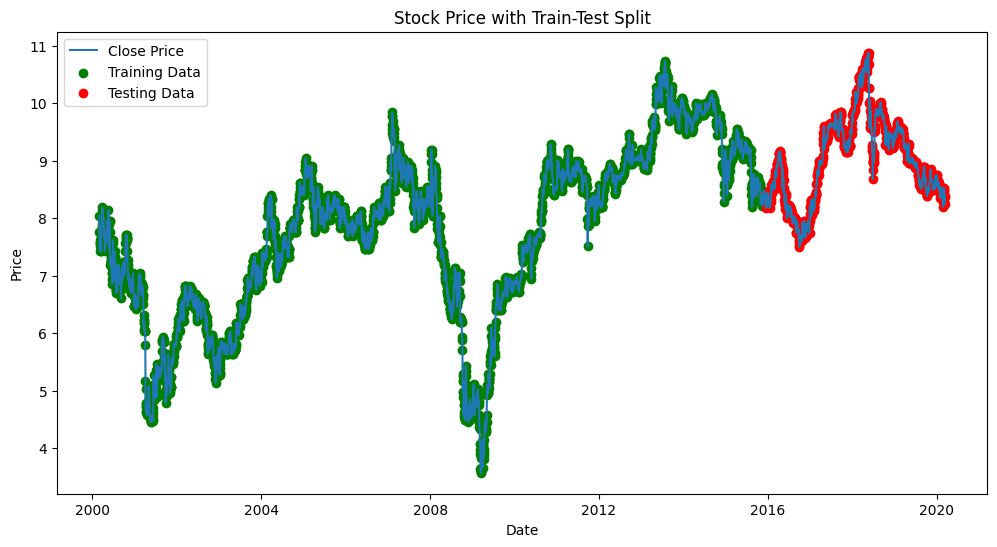

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.scatter(data['Date'].iloc[:len(x_train)], data['Close'].iloc[:len(x_train)], color='green', label='Training Data')
plt.scatter(data['Date'].iloc[len(x_train):], data['Close'].iloc[len(x_train):], color='red', label='Testing Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Train-Test Split')
plt.legend()
plt.show()


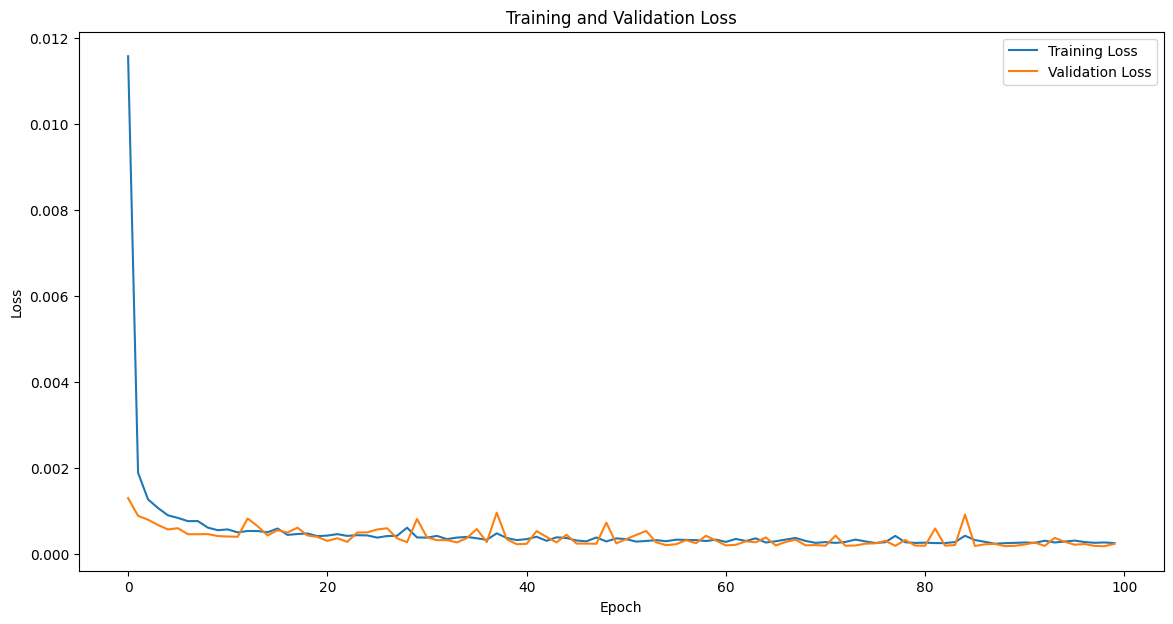

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


156/156 [==============================] - 0s 913us/step


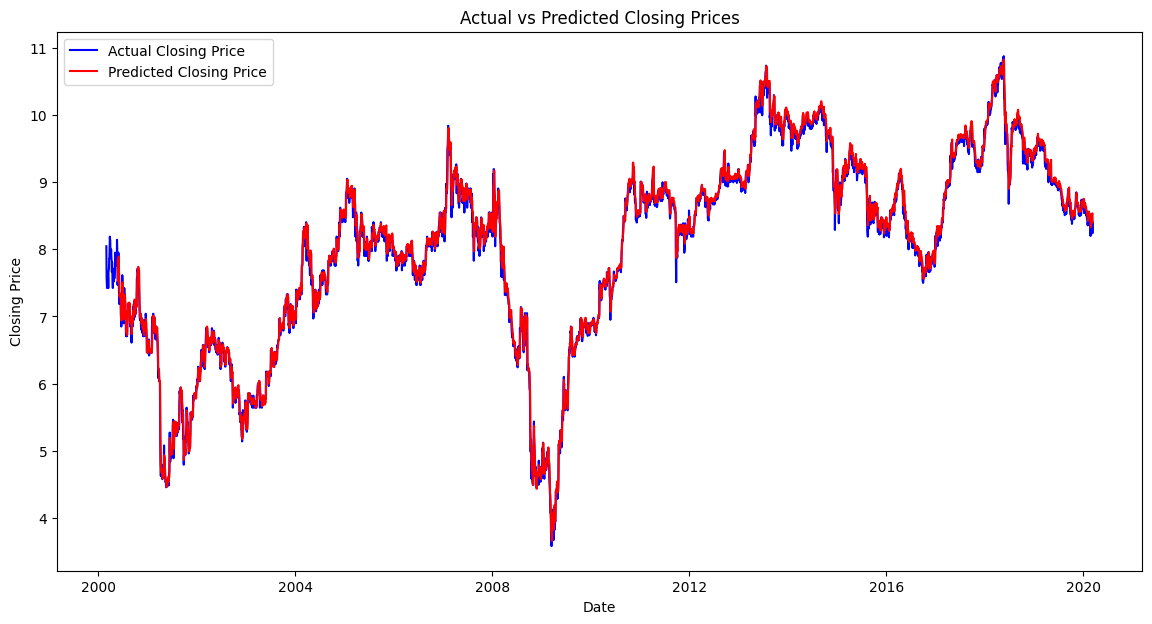

In [33]:
# Make predictions for the entire dataset
y_pred_all = model.predict(X)

# Inverse transform the predicted prices
y_pred_all_actual = scaler.inverse_transform(y_pred_all.reshape(-1, 1)).flatten()

# Plot the entire dataset with predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual Closing Price', color='blue')
plt.plot(data['Date'][look_back:len(y_pred_all_actual)+look_back], y_pred_all_actual, label='Predicted Closing Price', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()


32/32 [==============================] - 0s 1ms/step
           Date   APE (%)
4037 2016-03-10  0.158402
4038 2016-03-11  0.314275
4039 2016-03-14  0.143541
4040 2016-03-15  1.088134
4041 2016-03-16  0.256717
...         ...       ...
5028 2020-03-05  0.650536
5029 2020-03-06  0.154417
5030 2020-03-09  3.605592
5031 2020-03-10  0.339778
5032 2020-03-11  0.175792

[995 rows x 2 columns]


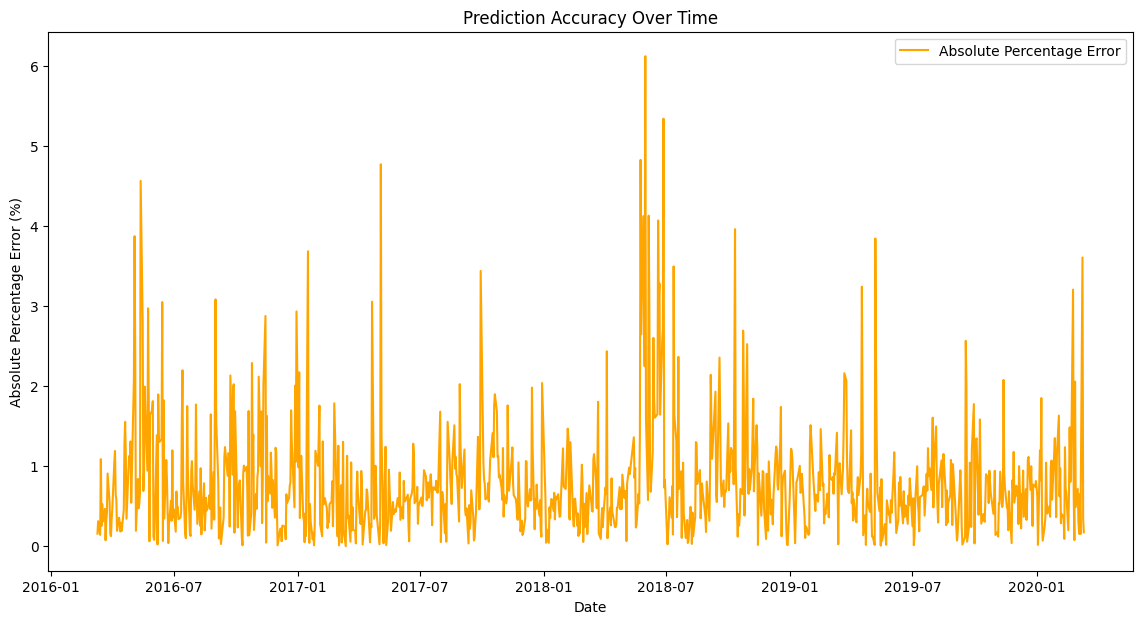

In [39]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Invert the scaling to get the original price values
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate the Absolute Percentage Error (APE)
abs_percentage_error = np.abs((y_test_actual - y_pred_actual) / y_test_actual) * 100

# Print the APE for each prediction
ape_data = pd.DataFrame({'Date': data['Date'][-len(abs_percentage_error):], 'APE (%)': abs_percentage_error})
print(ape_data)

# Plot the APE values over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-len(abs_percentage_error):], abs_percentage_error, label='Absolute Percentage Error', color='orange')
plt.xlabel('Date')
plt.ylabel('Absolute Percentage Error (%)')
plt.title('Prediction Accuracy Over Time')
plt.legend()
plt.show()


In [40]:
# Find the highest APE value
highest_ape = np.max(abs_percentage_error)

# Find the lowest APE value
lowest_ape = np.min(abs_percentage_error)

print(f'Highest APE: {highest_ape}')
print(f'Lowest APE: {lowest_ape}')


Highest APE: 6.117264479554431
Lowest APE: 0.0018119812011638003


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, y_pred_actual)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_actual, y_pred_actual)

# Calculate R-squared (R2)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.009304377928518012
Root Mean Squared Error (RMSE): 0.09645920344123733
Mean Absolute Error (MAE): 0.07171011494392127
R-squared (R2): 0.9826891200061346


In [46]:
# Define the number of epochs
epochs = 100 

# Define lists to store metrics for each epoch
mse_values = []
rmse_values = []
mae_values = []
r2_values = []

for epoch in range(epochs):
    # Train the model for one epoch
    history = model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=0, validation_split=0.1)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Calculate metrics for this epoch
    mse = mean_squared_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    r2 = r2_score(y_test_actual, y_pred_actual)
    
    # Store metrics for this epoch
    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

    # Print metrics for this epoch
    print(f'Epoch {epoch+1}: MSE={mse}, RMSE={rmse}, MAE={mae}, R2={r2}')

# Find the highest and lowest values for each metric
highest_mse = max(mse_values)
lowest_mse = min(mse_values)
highest_rmse = max(rmse_values)
lowest_rmse = min(rmse_values)
highest_mae = max(mae_values)
lowest_mae = min(mae_values)
highest_r2 = max(r2_values)
lowest_r2 = min(r2_values)

print(f'Highest MSE: {highest_mse}, Lowest MSE: {lowest_mse}')
print(f'Highest RMSE: {highest_rmse}, Lowest RMSE: {lowest_rmse}')
print(f'Highest MAE: {highest_mae}, Lowest MAE: {lowest_mae}')
print(f'Highest R2: {highest_r2}, Lowest R2: {lowest_r2}')

32/32 [==============================] - 0s 1ms/step
Epoch 1: MSE=0.008887784394785108, RMSE=0.09427504651171013, MAE=0.06446027550625441, R2=0.9834641960750641
32/32 [==============================] - 0s 1ms/step
Epoch 2: MSE=0.008643653065405217, RMSE=0.09297124859549438, MAE=0.06835437283923279, R2=0.9839184046399038
32/32 [==============================] - 0s 929us/step
Epoch 3: MSE=0.00912651999553014, RMSE=0.09553282156165042, MAE=0.07284803102962936, R2=0.9830200263125598
32/32 [==============================] - 0s 881us/step
Epoch 4: MSE=0.008732473433093385, RMSE=0.0934477042687159, MAE=0.06581152826817192, R2=0.9837531535357598
32/32 [==============================] - 0s 817us/step
Epoch 5: MSE=0.009452329090087596, RMSE=0.09722308928483807, MAE=0.07288974746627423, R2=0.982413855520689
32/32 [==============================] - 0s 1ms/step
Epoch 6: MSE=0.007844347037586751, RMSE=0.08856831847555169, MAE=0.06161177523052273, R2=0.985405520794497
32/32 [=========================

32/32 [==============================] - 0s 1ms/step
Epoch 1: MSE=0.007097431495424107, RMSE=0.0842462550824908, MAE=0.0584836161436148, R2=0.9867951639727153
32/32 [==============================] - 0s 931us/step
Epoch 2: MSE=0.0088956387372762, RMSE=0.09431669384195038, MAE=0.07010761659708453, R2=0.9834495829992262
32/32 [==============================] - 0s 925us/step
Epoch 3: MSE=0.013453159186178738, RMSE=0.11598775446648986, MAE=0.09370023345947265, R2=0.9749702746385107
32/32 [==============================] - 0s 919us/step
Epoch 4: MSE=0.006951748715575904, RMSE=0.08337714744206534, MAE=0.05799010753152359, R2=0.98706620811328
32/32 [==============================] - 0s 977us/step
Epoch 5: MSE=0.008155435181740663, RMSE=0.09030744809671383, MAE=0.06592108641197932, R2=0.9848267384651102
32/32 [==============================] - 0s 946us/step
Epoch 6: MSE=0.006925339779320155, RMSE=0.08321862639649945, MAE=0.057252901987813826, R2=0.9871153421800388
32/32 [======================

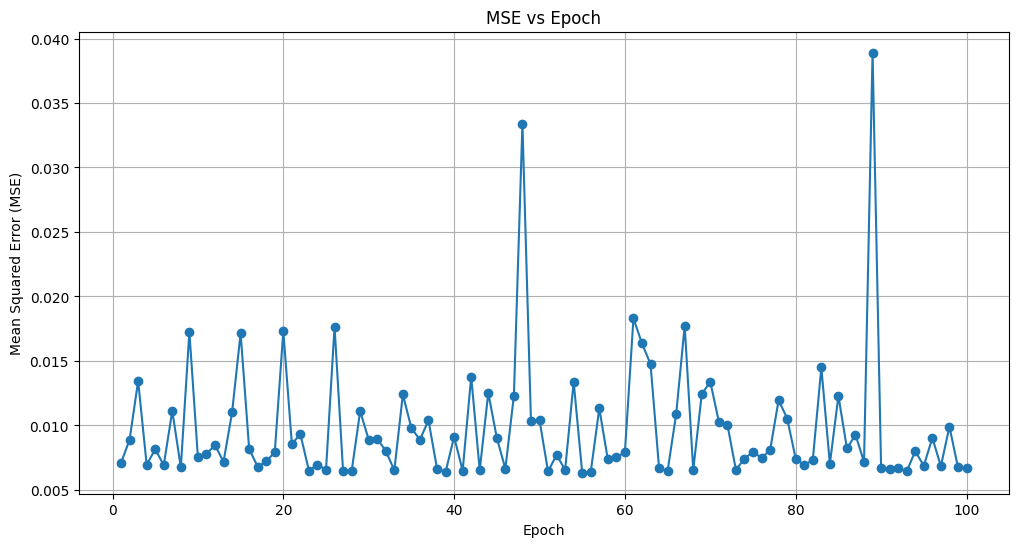

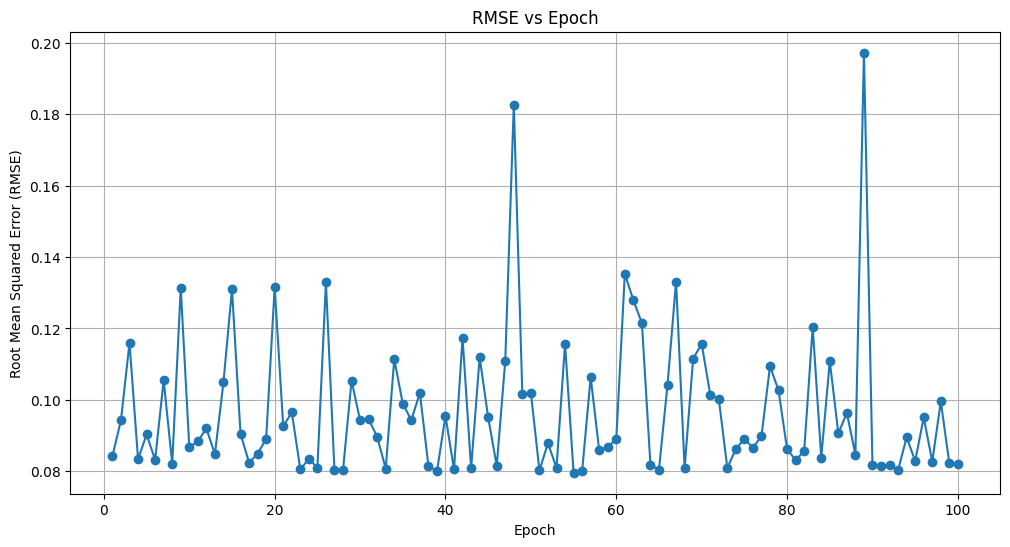

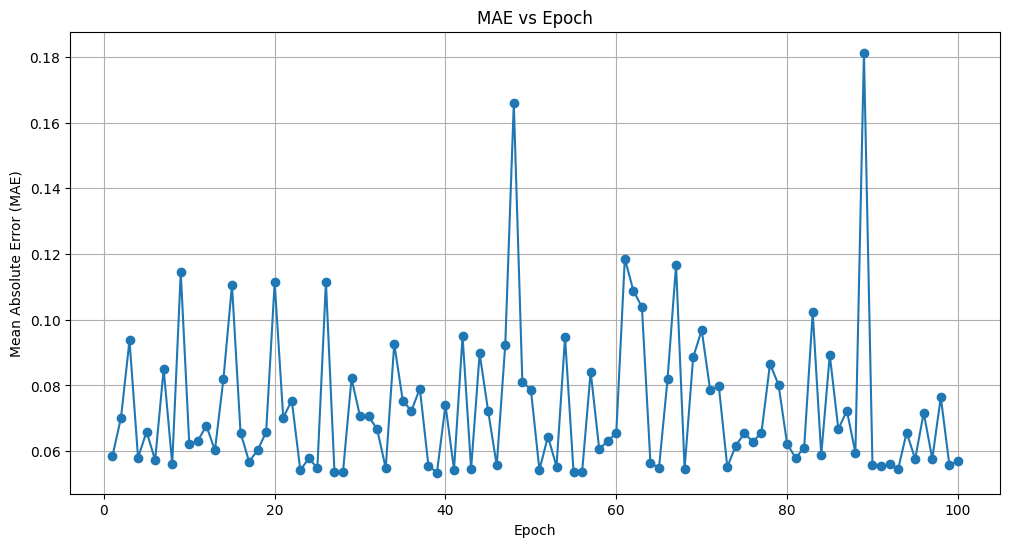

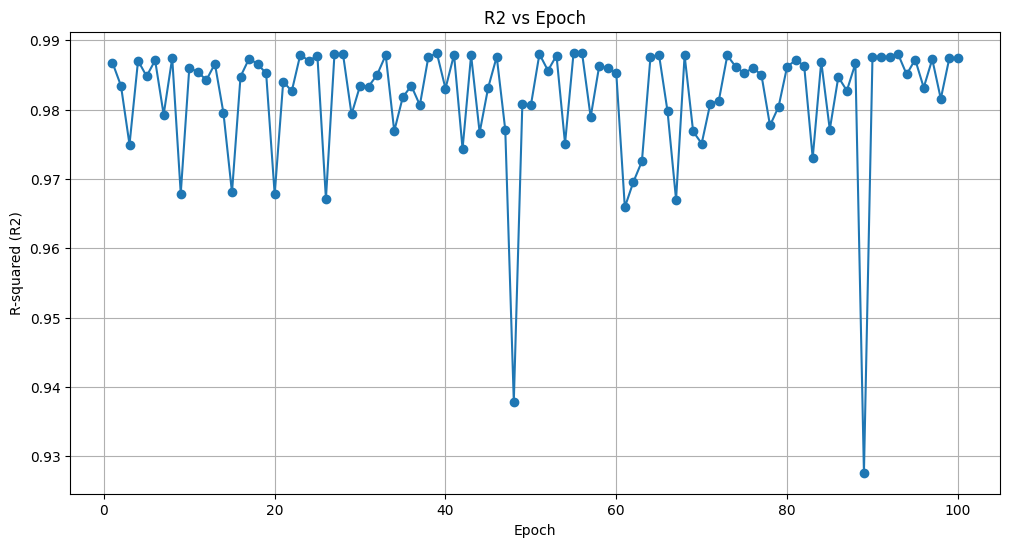

In [47]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = 100

# Define lists to store metrics for each epoch
mse_values = []
rmse_values = []
mae_values = []
r2_values = []

for epoch in range(epochs):
    # Train the model for one epoch
    history = model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=0, validation_split=0.1)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Calculate metrics for this epoch
    mse = mean_squared_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    r2 = r2_score(y_test_actual, y_pred_actual)
    
    # Store metrics for this epoch
    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

    # Print metrics for this epoch
    print(f'Epoch {epoch+1}: MSE={mse}, RMSE={rmse}, MAE={mae}, R2={r2}')

# Plot MSE
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), mse_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Epoch')
plt.grid(True)
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), rmse_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Epoch')
plt.grid(True)
plt.show()

# Plot MAE
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), mae_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Epoch')
plt.grid(True)
plt.show()

# Plot R2
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), r2_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('R-squared (R2)')
plt.title('R2 vs Epoch')
plt.grid(True)
plt.show()
